In [11]:
import pandas as pd
import os

res1 = pd.read_json(os.path.join(os.getcwd(), os.pardir, '1', 'story_report.json')
                    , orient ='index')
res2 = pd.read_json(os.path.join(os.getcwd(), os.pardir, '3 cross validation', 'story_report.json')
                    , orient ='index')

In [12]:
res1

,precision,recall,f1-score,support,accuracy,correct,with_warnings,total
[ketamine](drug),1.000000,1.000000,1.000000,2.0,NaN,NaN,NaN,NaN
[skin biopsy](lab),1.000000,1.000000,1.000000,1.0,NaN,NaN,NaN,NaN
[panic disorder test](lab),1.000000,1.000000,1.000000,1.0,NaN,NaN,NaN,NaN
[rash evaluation](lab),1.000000,1.000000,1.000000,2.0,NaN,NaN,NaN,NaN
drug_retrieve,0.666667,0.857143,0.750000,7.0,NaN,NaN,NaN,NaN
inform_drug,1.000000,0.500000,0.666667,2.0,NaN,NaN,NaN,NaN
inform_lab,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,NaN
[letrozole](drug),1.000000,1.000000,1.000000,1.0,NaN,NaN,NaN,NaN
prepare-lab,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,NaN
during_lab,1.000000,1.000000,1.000000,2.0,NaN,NaN,NaN,NaN


In [25]:
overall_indices = ['micro avg', 'macro avg', 'weighted avg']
intent_list = ['affirm',
            'any_detail_lab',
            'avoid_drug',
            'bot_challenge',
            'deny',
            'detail_lab',
            'dosage_drug',
            'during_lab',
            'goodbye',
            'greet',
            'inform_drug',
            'inform_lab',
            'interaction_drug',
            'mood_great',
            'mood_unhappy',
            'need_lab',
            'prepare_lab',
            'request_drug',
            'request_lab',
            'result_lab',
            'risk_lab',
            'sideeffects_drug',
            'usage_drug',
            'usage_lab',
            'warning_drug',
            'drugs_form'
            ]
intent_indices = [index for index in res1.index if index in intent_list]
action_indices = ['drug_retrieve','lab_retrieve','action_listen', 'utter_greet']
entity_indices = []
for index in res1.index:
    if index not in (overall_indices + intent_indices + action_indices):
        entity_indices.append(index)

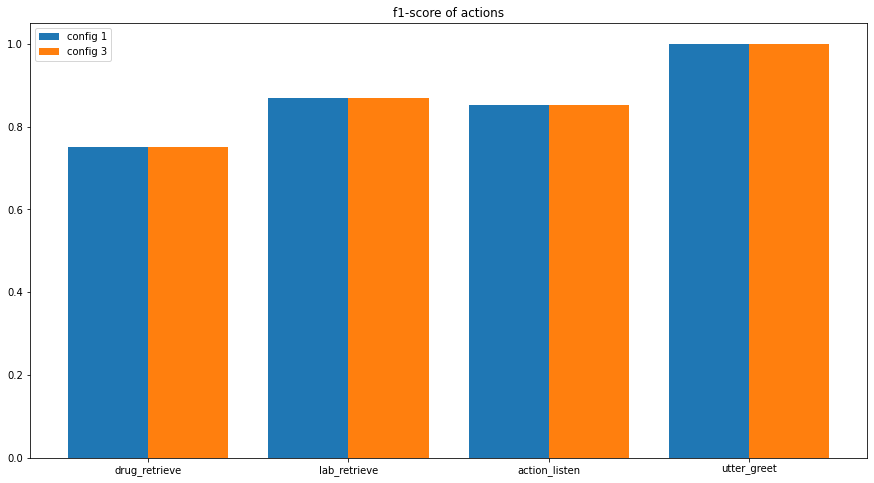

In [26]:
import matplotlib.pyplot as plt
import numpy as np
w = 0.4
fig, ax = plt.subplots(figsize=(15,8))
X_axis = np.arange(len(action_indices))
ax.bar(X_axis-w/2, res1.loc[action_indices, 'f1-score'], width=w , label='config 1')
ax.bar(X_axis+w/2, res2.loc[action_indices, 'f1-score'], width=w, label='config 3')
ax.set_xticks(X_axis)
ax.set_xticklabels(action_indices)
ax.legend()
ax.set_title('f1-score of actions')
plt.show()

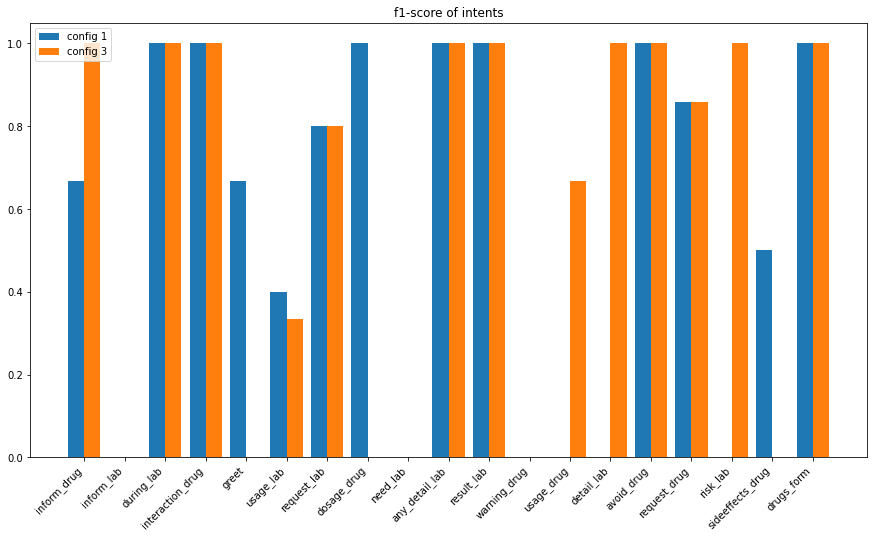

In [27]:
w = 0.4
fig, ax = plt.subplots(figsize=(15,8))
X_axis = np.arange(len(intent_indices))
ax.bar(X_axis-w/2, res1.loc[intent_indices, 'f1-score'], width=w , label='config 1')
ax.bar(X_axis+w/2, res2.loc[intent_indices, 'f1-score'], width=w, label='config 3')
ax.set_xticks(X_axis)
ax.set_xticklabels(intent_indices, rotation=45, ha='right')
ax.legend()
ax.set_title('f1-score of intents')
plt.show()

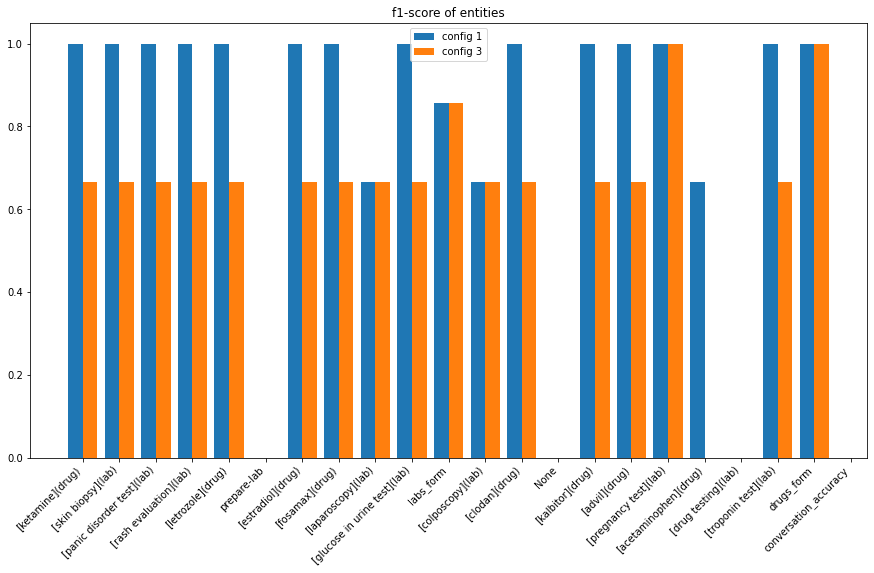

In [24]:
w = 0.4
fig, ax = plt.subplots(figsize=(15,8))
X_axis = np.arange(len(entity_indices))
ax.bar(X_axis-w/2, res1.loc[entity_indices, 'f1-score'], width=w , label='config 1')
ax.bar(X_axis+w/2, res2.loc[entity_indices, 'f1-score'], width=w, label='config 3')
ax.set_xticks(X_axis)
ax.set_xticklabels(entity_indices, rotation=45, ha='right')
ax.legend()
ax.set_title('f1-score of entities')
plt.show()

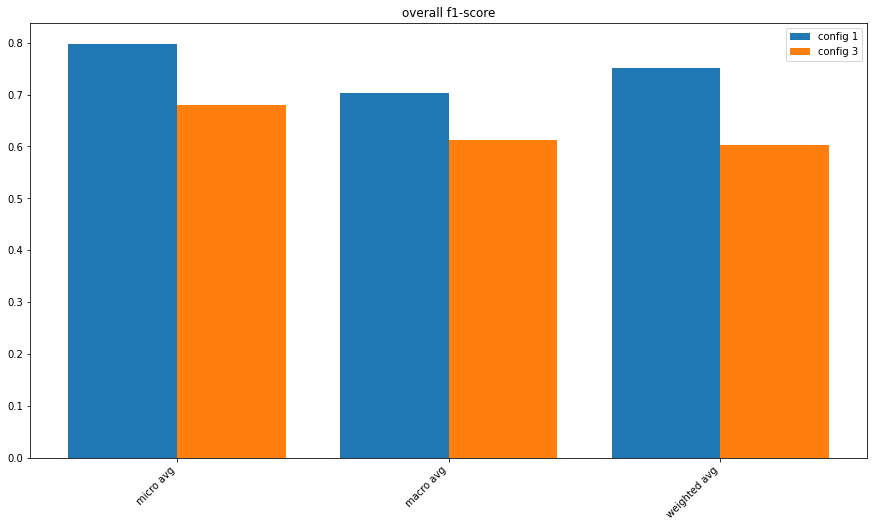

In [17]:
w = 0.4
fig, ax = plt.subplots(figsize=(15,8))
X_axis = np.arange(len(overall_indices))
ax.bar(X_axis-w/2, res1.loc[overall_indices, 'f1-score'], width=w , label='config 1')
ax.bar(X_axis+w/2, res2.loc[overall_indices, 'f1-score'], width=w, label='config 3')
ax.set_xticks(X_axis)
ax.set_xticklabels(overall_indices, rotation=45, ha='right')
ax.legend()
ax.set_title('overall f1-score')
plt.show()

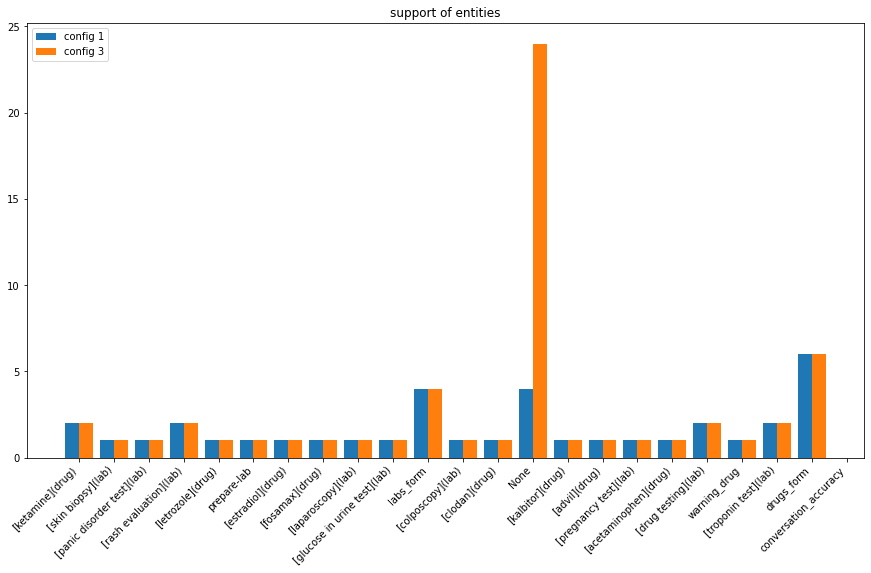

In [18]:
w = 0.4
fig, ax = plt.subplots(figsize=(15,8))
X_axis = np.arange(len(entity_indices))
ax.bar(X_axis-w/2, res1.loc[entity_indices, 'support'], width=w , label='config 1')
ax.bar(X_axis+w/2, res2.loc[entity_indices, 'support'], width=w, label='config 3')
ax.set_xticks(X_axis)
ax.set_xticklabels(entity_indices, rotation=45, ha='right')
ax.legend()
ax.set_title('support of entities')
plt.show()

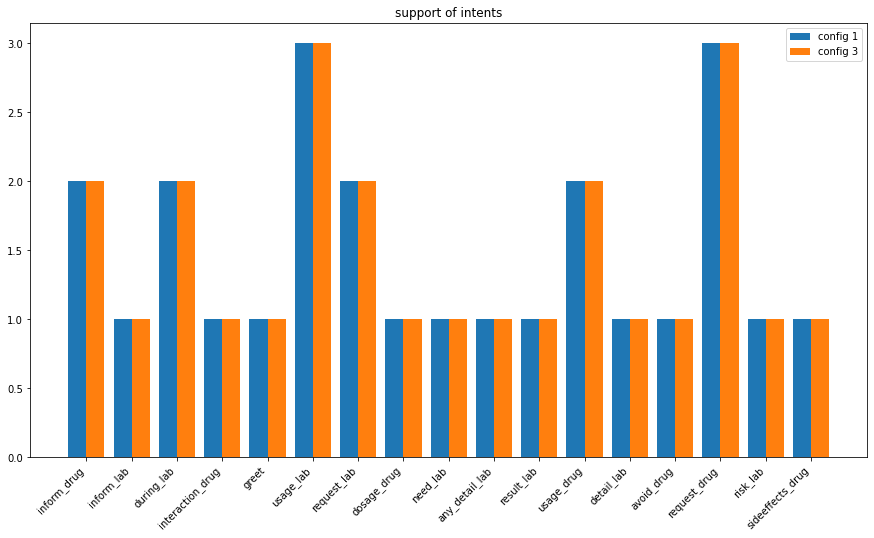

In [19]:
w = 0.4
fig, ax = plt.subplots(figsize=(15,8))
X_axis = np.arange(len(intent_indices))
ax.bar(X_axis-w/2, res1.loc[intent_indices, 'support'], width=w , label='config 1')
ax.bar(X_axis+w/2, res2.loc[intent_indices, 'support'], width=w, label='config 3')
ax.set_xticks(X_axis)
ax.set_xticklabels(intent_indices, rotation=45, ha='right')
ax.legend()
ax.set_title('support of intents')
plt.show()

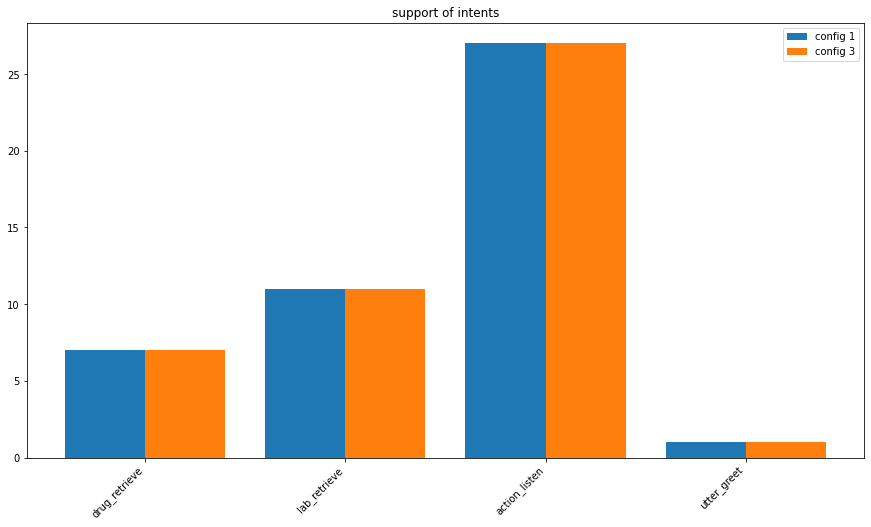

In [20]:
w = 0.4
fig, ax = plt.subplots(figsize=(15,8))
X_axis = np.arange(len(action_indices))
ax.bar(X_axis-w/2, res1.loc[action_indices, 'support'], width=w , label='config 1')
ax.bar(X_axis+w/2, res2.loc[action_indices, 'support'], width=w, label='config 3')
ax.set_xticks(X_axis)
ax.set_xticklabels(action_indices, rotation=45, ha='right')
ax.legend()
ax.set_title('support of intents')
plt.show()